# Assignment 2  (20 points)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

Import olympics.csv file

In [2]:
uploaded = files.upload()

Saving olympics.csv to olympics.csv


### List our Olympics DataFrame.

In [3]:
olympics_df = pd.read_csv("olympics.csv", skiprows=4)
olympics_df

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


### List only the NOC column using both the ['..'] and dot notation. What type is this object? (2 points)

In [4]:
# List the NOC column using ['..'] notation
noc_bracket_col = olympics_df['NOC']

# List the NOC column using dot notation
noc_dot_col = olympics_df.NOC

# Type of this object
print(type(noc_dot_col))

<class 'pandas.core.series.Series'>


### List the Edition, City, Athlete Name and Medal columns. What type is this object? (2 points)

In [5]:
# List the Edition, City, Athlete Name and Medal columns
edition_city_athlete_medal_cols = olympics_df[['Edition', 'City', 'Athlete', 'Medal']]

# Type of this object
print(type(edition_city_athlete_medal_cols))

<class 'pandas.core.frame.DataFrame'>


In which events did Jesse Owens win a medal?

In [6]:
jesse_owens_medals = olympics_df[olympics_df['Athlete'] == 'OWENS, Jesse']
jesse_owens_medals

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
6427,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,100m,M,Gold
6439,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,200m,M,Gold
6456,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,4x100m relay,M,Gold
6523,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,long jump,M,Gold


Which country has won the most men's gold medals in singles badminton over the years? Sort the results alphabetically by the player's names.(2 points)

In [7]:
men_gold_badminton_medals = olympics_df[(olympics_df['Medal'] == 'Gold') &
                                        (olympics_df['Sport'] == 'Badminton') &
                                        (olympics_df['Gender'] == 'Men') &
                                        (olympics_df['Event'] == 'singles')]

men_gold_badminton_medals.sort_values(by='Athlete')

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
20045,Barcelona,1992,Badminton,Badminton,"BUDI KUSUMA, Alan",INA,Men,singles,M,Gold
25734,Athens,2004,Badminton,Badminton,"HIDAYAT, Taufik",INA,Men,singles,M,Gold
21787,Atlanta,1996,Badminton,Badminton,"HOYER-LARSEN, Poul Erik",DEN,Men,singles,M,Gold
23717,Sydney,2000,Badminton,Badminton,"JI, Xinpeng",CHN,Men,singles,M,Gold
27741,Beijing,2008,Badminton,Badminton,"LIN, Dan",CHN,Men,singles,M,Gold


Which three countries have won the most medals in recent years (from 1984 to 2008)? (2 points)

In [8]:
recent_medals = olympics_df[(olympics_df['Edition'] >= 1984) &
                            (olympics_df['Edition'] <= 2008)]

medals_by_country = recent_medals['NOC'].value_counts()

medals_by_country.head(3)

,count
NOC,
USA,1837
AUS,762
GER,691


Display the male gold medal winners for the 100m Track event over the years. List the results starting with the most recent. Show the Olympic City, Edition, Athlete and the country they represent. (2 points)

In [9]:
male_gold_track_medals = olympics_df[(olympics_df['Medal'] == 'Gold') &
                                      (olympics_df['Gender'] == 'Men') &
                                       (olympics_df['Event'] == '100m')]

male_100m_gold_sorted = male_gold_track_medals.sort_values(by='Edition', ascending=False)

male_100m_gold_sorted[['City', 'Edition', 'Athlete', 'NOC']]

,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",JAM
25539,Athens,2004,"GATLIN, Justin",USA
23521,Sydney,2000,"GREENE, Maurice",USA
21598,Atlanta,1996,"BAILEY, Donovan",CAN
19859,Barcelona,1992,"CHRISTIE, Linford",GBR
18284,Seoul,1988,"LEWIS, Carl",USA
16794,Los Angeles,1984,"LEWIS, Carl",USA
15374,Moscow,1980,"WELLS, Allan",GBR
14069,Montreal,1976,"CRAWFORD, Hasely",TRI
12902,Munich,1972,"BORZOV, Valery",URS


Which countries did not win a medal in the 2008 Olympics? How many countries were there? (2 points)

In [14]:
all_countries = olympics_df['NOC'].drop_duplicates()

countries_with_medals_2008 = olympics_df[(olympics_df['Edition'] == 2008) &
                                        (olympics_df['Medal'].notna())]['NOC'].drop_duplicates()

countries_no_medals_2008 = set(all_countries) - set(countries_with_medals_2008)

print(f"Countries that did not win a medal in the 2008 Olympics: {countries_no_medals_2008}")
print(f"Number of countries that did not win a medal: {len(countries_no_medals_2008)}")

Countries that did not win a medal in the 2008 Olympics: {'UAE', 'NIG', 'GDR', 'CIV', 'URU', 'NAM', 'TGA', 'SEN', 'SYR', 'PUR', 'ZZX', 'ISV', 'DJI', 'EUN', 'KUW', 'BDI', 'TCH', 'URS', 'KSA', 'IOP', 'ERI', 'CRC', 'FRG', 'LIB', 'IRQ', 'QAT', 'BWI', 'BER', 'PER', 'TAN', 'UGA', 'EUA', 'MKD', 'BAR', 'HAI', 'SUR', 'BOH', 'MOZ', 'PAR', 'HKG', 'RU1', 'LUX', 'PAK', 'AHO', 'SCG', 'YUG', 'PHI', 'ZAM', 'GHA', 'GUY', 'ANZ', 'SRI'}
Number of countries that did not win a medal: 52


Using groupby(), plot the total number of medals awarded at each of the Olympic games throughout history. (2 points)

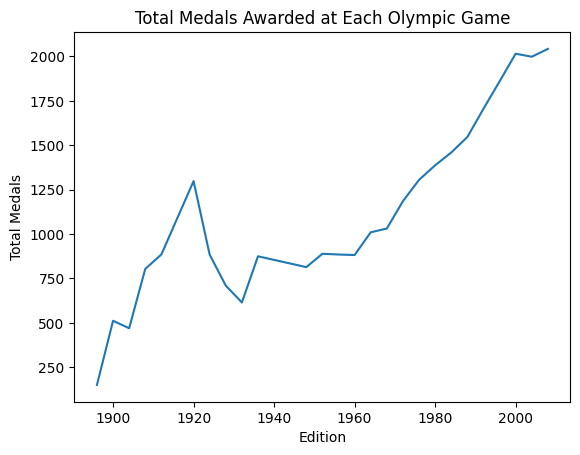

In [15]:
medals_by_edition = olympics_df.groupby('Edition')['Medal'].count()

medals_by_edition.plot(kind='line')

plt.xlabel('Edition')
plt.ylabel('Total Medals')
plt.title('Total Medals Awarded at Each Olympic Game')
plt.show()

Create a list showing the total number of medals won for each country over the history of the Olympics. For each country, include the year of the first and most recent Olympic medal wins. (3 points)

In [17]:
# Filter only rows with a medal (Gold, Silver, Bronze)
medals_data = olympics_df[olympics_df['Medal'].notna()]

# Group by country (NOC) and aggregate the total medals, first medal year, and most recent medal year
medals_summary = medals_data.groupby('NOC').agg(
    total_medals=('Medal', 'count'),                    # Count total medals
    first_medal_year=('Edition', 'min'),                # First medal year
    most_recent_medal_year=('Edition', 'max')           # Most recent medal year
).reset_index()

print(medals_summary)

     NOC  total_medals  first_medal_year  most_recent_medal_year
0    AFG             1              2008                    2008
1    AHO             1              1988                    1988
2    ALG            14              1984                    2008
3    ANZ            29              1908                    1912
4    ARG           239              1924                    2008
..   ...           ...               ...                     ...
133  VIE             2              2000                    2008
134  YUG           435              1924                    2000
135  ZAM             2              1984                    1996
136  ZIM            23              1980                    2008
137  ZZX            48              1896                    1904

[138 rows x 4 columns]


Plot the number of medals achieved by the Chinese team (men and women) in Beijing 2008 using:
- matplotlib
- Seaborn      (3 points)

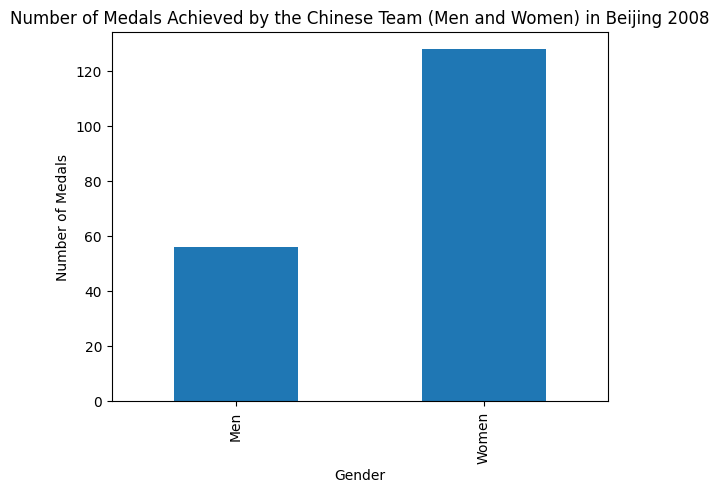

<function matplotlib.pyplot.show(close=None, block=None)>

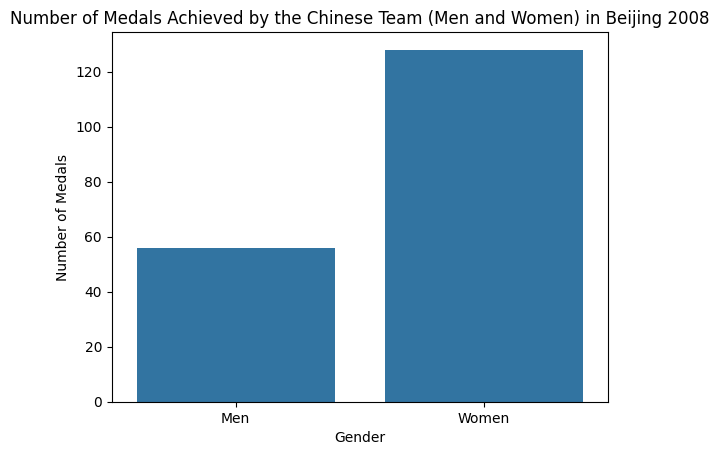

In [19]:
china_2008 = olympics_df[(olympics_df['NOC'] == 'CHN') &
                         (olympics_df['Edition'] == 2008)]

medals_by_gender = china_2008.groupby('Gender')['Medal'].count()

# Plot with Matplotlib
medals_by_gender.plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('Number of Medals')
plt.title('Number of Medals Achieved by the Chinese Team (Men and Women) in Beijing 2008')
plt.show()

# Plot with Seaborn
sns.barplot(x=medals_by_gender.index, y=medals_by_gender.values)

plt.xlabel('Gender')
plt.ylabel('Number of Medals')
plt.title('Number of Medals Achieved by the Chinese Team (Men and Women) in Beijing 2008')
plt.show